Confidential: Property of the Data Jedi Academy, unauthorised distribution not allowed

<img align="left" src = "DATA-JEDI logo.png" width="200" height="60">

### Web Scraping 101 

Web scraping consists in gathering data available on websites. This can be done manually by a human user or by a bot. The latter can of course gather data much faster than a human user and that is why we are going to focus on this. Is it therefore technically possible to collect all the data of a website in a matter of minutes this kind of bot. The legality of this practice is not well defined however. Websites usually describe in their terms of use and in their robots.txt file if they allow scrapers or not. 

[Introduction to Web scraping](https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5)

Content

1. How does web scraping work
2. Web scraping tools
3. Web scraping tutorial
4. Web scraping property site

#### 1. How does web scraping work

Web scrapers gather website data in the same way a human would do it: the scraper goes onto a web page of the website, gets the relevant data, and move forward to the next web page. Every website has a different structure, that is why web scrapers are usually built to explore one website. The two important issues that arise during the implementation of a web scraper are the following:
- What is the structure of the web pages that contain relevant data?
- How can we get to those web pages?

In order to answer those questions, we need to understand a little how websites work. Websites are created using HTML (Hypertext Markup Language), along with CSS (Cascading Style Sheets) and JavaScript. HTML elements are separated by tags and they directly introduce content to the web page. Here is what a basic HTML document looks like:

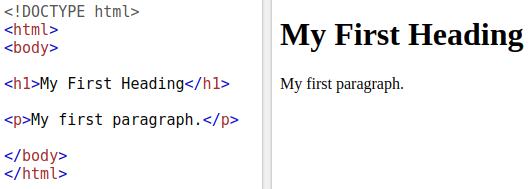

We can see that the content of the first heading is contained between the ‘h1’ tags. The first paragraph is contained between the ‘p’ tags. On a real website, we need to find out between which tags the relevant data is and tell it to our scraper. We also need to specify which links should be explored and where they can be found among the HTML file. With all this information, our scraper should be able to gather the required data.

The common html tags you would typically encounter for webscraping include:
- h1 to h6
- p
- div
- span
- class

[HTML tags](https://www.w3schools.com/TAGS/default.ASP)

#### 2. Web scraping tools

In web scraping, the most common web scraping tools are Requests and Beautifulsoup.

- Requests will allow us to send HTTP requests to a website to get the HTML files.
- BeautifulSoup will be used to parse (manipulate) the HTML files. It is one of the most used library for web scraping. Its is quite simple to use and has many features that help gathering websites data efficiently.


- Requests-HTML - Requests-HTML wraps up the best bits from Requests and Beautiful Soup packages to create a web scraper that’s quick and easy to use. It is becoming more popular tool because it is quick, easy to use and more dynamic.

In this tutorial we are going to use the Request-html module instead. This is because it requires fewer lines of code and also can scrape dynamic websites in which beatifulsoup and requests may not be able to.



#### 3. Webscraping Tutorial with Requests-HTML

https://www.youtube.com/watch?v=JKVsZtgITrs



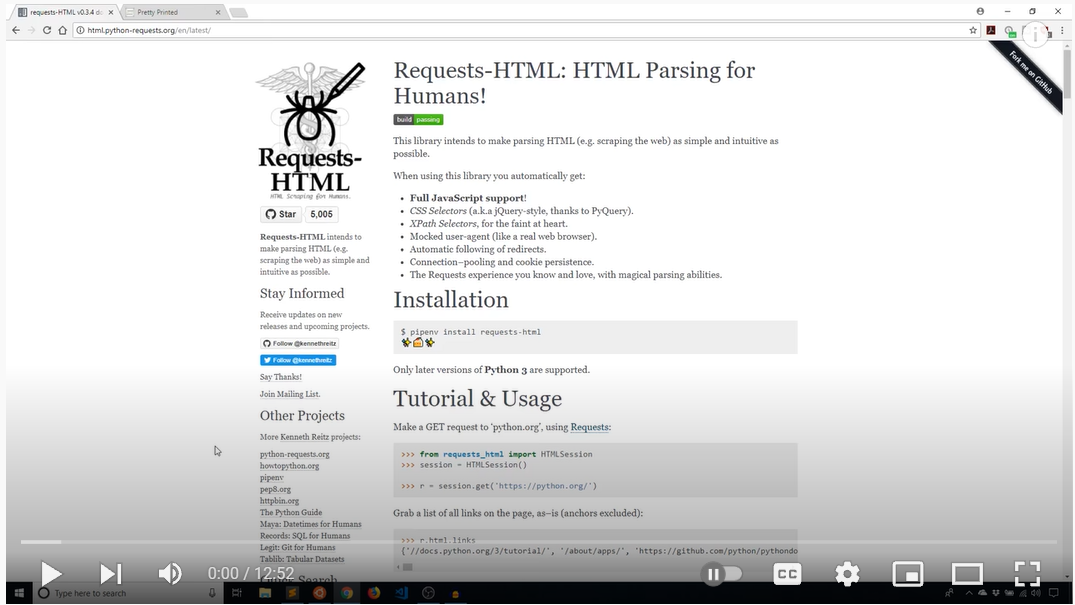

#### 4. Web scraping the property website

#### Kindly ensure you have the legal rights to scrape and use data from a site before doing so. Propertypro is more flexible about this as seen in the terms and conditions page however Nigeria Property center is not. Check below for more: 

#### https://www.propertypro.ng/terms
#### https://nigeriapropertycentre.com/terms-of-use 

#### Import requests-html for making request to a website and scraping. re for regular expressions

In [1]:
import requests, re
from requests_html import HTMLSession

C:\Users\aoluleye001\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


#### Make a request to the website and extract its content (page source)

In [2]:
r=requests.get("https://www.propertypro.ng/property-for-rent?search=gbagada")
c=r.content

#### Create a Session and make a request to the website and extract its content (page source)

In [3]:
session = HTMLSession()
r = session.get(f'https://www.propertypro.ng/property-for-rent/in/lagos/gbagada')

#### Find all properties on the page

In [4]:
properties = r.html.find('div.single-room-text')
properties

[<Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>,
 <Element 'div' class=('single-room-text',)>]

#### To learn more about HTML tags check the link >>> https://www.w3schools.com/tags/default.asp

###### .

#### Collect property features on the page.For this add the index of the feature at the end of the code e.g. [0] for bed, [2] for bath.

#### This first method is not ideal because the location of the specific feature might change. For example Bed may not come first

In [18]:
properties[2].find('div.fur-areea')[0].text.split()

['4', 'beds', '4', 'baths', '4', 'Toilets']

#### This second method uses regular expressions and is a better way to collect feature information, because it checks for the feature before collecting. If the feature does not exist it will give a none. For more on regular expressions check https://www.w3schools.com/python/python_regex.asp 

In [19]:
re.findall("..bath",properties[2].find('div.fur-areea')[0].text)[0].strip()

'4 bath'

#### You can change div and class below to search for something else. 

In [20]:
properties[3].find('div.fur-areea')[0].text

'1 beds 1 baths 2 Toilets'

#### Websites typically have a structure which allows for easy automation. For example location and page number can eaasily be changed and the website will respond accordingly. Try changing the location below and page number to surulere and page 2 respectively.

In [ ]:
https://www.propertypro.ng/property-for-rent?search=gbagada&page=1

#### There is a slight challenge from above. You will need to get the total number of pages. This can be calculated using total number of items divided by number of listing on each page. The listing is written within a text so this has to be extracted using regular expressions. 

In [10]:
r.html.find('div.property-sale-number')[0].text

'Result 1 - 20 of 5526\nSort By\nMost Recent\nLowest Price\nHighest Price\nBeds'

In [11]:
re.findall("\d+",r.html.find('div.property-sale-number')[0].text)

['1', '20', '5526']

In [12]:
re.findall("\d+",r.html.find('div.property-sale-number')[0].text)[2]

'5526'

In [13]:
items = int(re.findall("\d+",r.html.find('div.property-sale-number')[0].text)[2])
listings = 20
page_nr = int(items/listings)
page_nr

276

#### The code below is used to extract the details on just one page per location. You can update the code to scrape multiple pages and locations or write your own code. Please as indicated in the instructions, do not scrape multiple locations or pages until off peak hours (>6pm) to avoid overloading the site.


In [ ]:
#session = HTMLSession()

In [127]:
l = []
locations = ['gbagada']

for place in locations:
    #base_url="https://www.propertypro.ng/property-for-rent?search="+place+ "&auto=&type=&bedroom=&max_price="
    r = session.get(f'https://www.propertypro.ng/property-for-rent/in/lagos/'+place)
    
    properties = r.html.find('div.single-room-text')

    for i in list(range(0,len(properties))):
        d={}
        d["location"] = place
        try:
            d["specific_location"] = properties[i].find('h4')[0].text
        except (IndexError,TypeError,AttributeError):
            d["location"] = None
        try:
            d["features"]= properties[i].find('div.fur-areea')[0].text 
        except (AttributeError,IndexError) as e:
            d["features"]= None
        try:
            d["bed"]= int(re.findall("..bed",properties[i].find('div.fur-areea')[0].text)[0].strip()[0][0])
        except (IndexError,TypeError,AttributeError,ValueError) as e:
            d["bed"]= 0 
        try:
            d["bath"]= int(re.findall("..bath",properties[i].find('div.fur-areea')[0].text)[0].strip()[0][0])
        except (IndexError,TypeError,AttributeError,ValueError) as e:
            d["bath"]= 0
        try:
            d["toilet"]= int(re.findall("..Toilet",properties[i].find('div.fur-areea')[0].text)[0].strip()[0][0])
        except (IndexError,TypeError,AttributeError,ValueError) as e:
            d["toilet"]= 0
        try:
            d["description"]= properties[i].find('h3.listings-property-title2')[0].text
        except (IndexError,TypeError,AttributeError) as e:
            d["description"]= None

        try:
            d["price"]= properties[i].find('h3.listings-price')[0].text.replace("₦ ","").replace(",","")
        except (IndexError,TypeError,AttributeError) as e:
            d["price"] = None
        l.append(d)

#### Convert output to dataframe

In [128]:
import pandas as pd
ld = pd.DataFrame(l)
ld

,bath,bed,description,features,location,price,specific_location,toilet
0,4,4,Tastefully Finished 4Bedroom Terraced Duplex i...,4 beds 4 baths 4 Toilets,gbagada,65000000,Phase 1Phase 1 Gbagada Lagos,4
1,3,3,Newly renovated 3bedroom flat,3 beds 3 baths 4 Toilets,gbagada,3000000,Phase 1 Gbagada Lagos,4
2,0,4,Tastefully finished and serviced 4bedroom Terr...,4 beds baths Toilets,gbagada,2800000,Gbagada Lagos,0
3,0,0,Spacious miniflat,beds baths Toilets,gbagada,500000,Ifako Gbagada Gbagada Lagos,0
4,0,0,Standard self-contained,0 beds 0 baths 0 Toilets,gbagada,400000,...Gbagada Lagos,0
5,5,4,Renovated 5 bedroom office space at Atunrase g...,4 beds 5 baths 5 Toilets,gbagada,3000000,Atunrase Medina Gbagada Lagos,5
6,0,0,Lovely miniflat,beds baths Toilets,gbagada,700000,Gbagada Lagos,0
7,4,4,Executive and tastefully finished 4bedroom dup...,4 beds 4 baths 5 Toilets,gbagada,3000000,Medina Gbagada Lagos,5
8,0,4,An executive 4bedroom Terrance duplex,4 beds baths Toilets,gbagada,3800000,Atunrase Medina Gbagada Lagos,0
9,5,5,Luxury 5 bedroom detached duplex with bq,5 beds 5 baths 6 Toilets,gbagada,None,Lekki Lekki Lagos,6


In [ ]:
ld.to_csv("House_prices_gbagada.csv")